8.로지스틱 회귀

Contents
<div id="toc"></div>

# 1. 로지스틱 회귀

- 선형 회귀 모형을 ‘**분류**’에 적용한 기법 (2개 클래스 분류)
- 데이터가 특정 레이블(클래스)에 소속될 확률을 추정한다.
    - 예1) 이 이메일이 스팸일 확률은 얼마인가?
    - 예2) 이번 시험에서 합격할 확률은 얼마인가?
- 다른 선형 회귀 모형과는 다르게, 종속변수가 수치형 (numerical)이 아니라 범주형(categorical)이다.
    - 예1) 스팸메일, 정상메일
    - 예2) 합격, 불합격
- 특정 클래스에 대해서 추정된 확률이 50% 이상이면 해당 데이터를 그 클래스에 속하는 것으로 분류한다.

- 기본적인 로지스틱 회귀는 **이항형(binomial)** 으로서, 종속변수의 값의 종류는 0과 1의 두 종류 뿐이다.
    - 즉, 이 경우의 종속변수는 곧 클래스 그 자체이다.
    - 값이 0이면 음성, 1이면 양성이라고 표현할 수 있다.
- 이러한 이진 데이터에 대해서 올바른 결과를 나타내는 선형회귀를 수행하려면 다음과 같은 성질이 필요하다.
    - 연속적인 단조 증가(monotone increasing) 함수일 것
    - 함수의 결과가 [0, 1] 사이의 값일 것
- 이와 같은 성질을 만족하는 함수를 **시그모이드(sigmoid) 함수**라고 한다

# 2. 시그모이드 함수와 확률 추정

- 시그모이드 함수 (로지스틱 함수)
![image.png](img/ch8_1.png)

- 예측값 t가 시그모이드 함수에 전달되면 결과 값 σ (t)가 계산되며, 이 값은 추정된 확률 p이다. (0 ≤ p ≤ 1)

- 추정된 확률 p의 값이 0.5 이상이면 결과를 1으로 분류하고 p의 값이 0.5 미만이면 0으로 분류한다.
- 즉, t ≥ 0 이면 결과는 양성, t < 0 이면 결과는 음성이다.

# 3. 실습

1. 데이터 선정 및 분포 정보 확인
    - 붓꽃 데이터를 불러와서 정보를 확인한다.
    ```python
    import sklearn.datasets as d
    
    iris = d.load_iris()
    print(iris.DESCR)
    ```
    
    - 붓꽃 데이터를 불러와서 정보를 확인한다.
    ```python
    print("특성 :", iris.feature_names)
    print("클래스 :", iris.target_names)
    
    print("특성 자료형 :", type(iris.data))
    print("클래스 자료형 :", type(iris.target))
    ```
    
    - 꽃받침의 길이와 너비 컬럼을 선택하여 산점도를 그린다.
    ```python
    import matplotlib.pyplot as plt
    
    c_set = ["blue", "red", "green"]
    m_set = ["o", "x", "^"]
    l_set = iris.target_names
    
    X = iris.data
    Y = iris.target
    
    for t in set(Y):
        X_pts = [X[i,0] for i in range(len(Y)) if Y[i] == t]
        Y_pts = [X[i,0] for i in range(len(Y)) if Y[i] == t]
        plt.scatter(X_pts, Y_pts, color = c_set[t], marker = m_set[t], label = l_set[t])
    
    plt.xlabel(iris.feature_names[0], fontsize=14)
    plt.ylabel(iris.feature_names[1], fontsize = 14)
    plt.legend(loc = 'best', fontsize = 12)
  
    ```

- 산점도를 바탕으로, 각 클래스 분포를 확인한다.
![image.png](img/ch8_2.png)

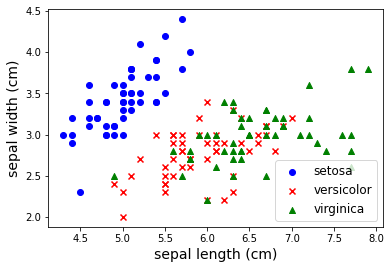

In [87]:
import sklearn.datasets as d

iris = d.load_iris()
#print(iris.DESCR)

import matplotlib.pyplot as plt
    
c_set = ["blue", "red", "green"]
m_set = ["o", "x", "^"]
l_set = iris.target_names

X = iris.data
Y = iris.target  # 소문자 y: 데이터 추정

for t in set(Y):
    X_pts = [X[i,0] for i in range(len(Y)) if Y[i] == t]
    Y_pts = [X[i,1] for i in range(len(Y)) if Y[i] == t]
    plt.scatter(X_pts, Y_pts, color = c_set[t], marker = m_set[t], label = l_set[t])

plt.xlabel(iris.feature_names[0], fontsize=14)
plt.ylabel(iris.feature_names[1], fontsize = 14)
plt.legend(loc = 'best', fontsize = 12)
plt.show()

- 동일한 방식으로 꽃잎의 길이와 너비 컬럼에 대해 산점도를 그려서 각 클래스 분포를 확인한다.


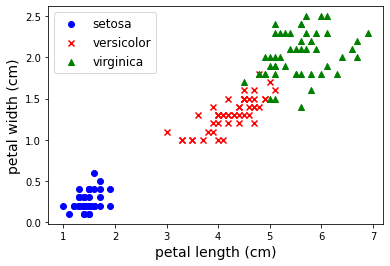

In [15]:
for t in set(Y):
    X_pts = [X[i,2] for i in range(len(Y)) if Y[i] == t]
    Y_pts = [X[i,3] for i in range(len(Y)) if Y[i] == t]
    plt.scatter(X_pts, Y_pts, color = c_set[t], marker = m_set[t], label = l_set[t])

plt.xlabel(iris.feature_names[2], fontsize=14)
plt.ylabel(iris.feature_names[3], fontsize = 14)
plt.legend(loc = 'best', fontsize = 12)
plt.show()

## 3.1 사이킷런으로 로지스틱 회귀

1. 데이터를 학습용과 검증용으로 분리한다.

```python
import sklearn.model_selection as ms

X_ptls = X[:, 2:4]
Y_vgnc = (Y == 2).astype(np.int)

X_train, X_test, y_train, y_test= \
    ms.train_test_split(X_ptls, Y_vgnc, test_size = 0.3, random_state = 42)

X_train[0:3,], y_train[0:3,]
```

2. **linear_model** 모듈에 있는 **LogisticRegression**을 이용하여 로지스틱 회귀를 수행한다.
    -  매개변수 solver는 회귀를 수행할 알고리즘의 이름이다.
    - 기본값은 ‘liblinear’이다.

```python
import sklearn.linear_model as lm

logr = lm.LogisticRegression(solver = "liblinear")
reg = logr.fit(X_train, y_train)
```
- 매개변수 solver의 기본값이 추후 사이킷런 0.22 버전에서 ‘lbfgs’로 변경될 예정이다.

- 검증 데이터로 예측을 수행한 뒤, **metrics** 모듈에 있는 **accuracy_score** 함수를 이용하여 정확도를 계산한다.
    - 이 때 첫 번째 매개변수는 검증 데이터의 클래스 실제값이고, 두 번째 매개변수는 클래스 예측값이다. 

```python
import sklearn.metrics as mt

y_pred = reg.predict(X_test)

accuracy = mt.accuracy_score(y_test, y_pred)
print("예측 정확도 :", round(accuracy))
```

- 검증 데이터의 예측 결과에 대한 분포를 확인한다.
![image.png](img/ch8_3.png)

In [34]:
import sklearn.model_selection as ms
import numpy as np

X_ptls = X[:, 2:4]
Y_vgnc = (Y == 2).astype(np.int)

X_train, X_test, y_train, y_test= \
    ms.train_test_split(X_ptls, Y_vgnc, test_size = 0.3, random_state = 42)

print(X_train[0:3,])
print(y_train[0:3,])
                        
                        
import sklearn.linear_model as lm

logr = lm.LogisticRegression(solver = "liblinear")
reg = logr.fit(X_train, y_train)
         
                             
import sklearn.metrics as mt

y_pred = reg.predict(X_test)

accuracy = mt.accuracy_score(y_test, y_pred)
print("예측 정확도 :", round(accuracy))

[[3.7 1. ]
 [5.1 1.5]
 [5.5 1.8]]
[0 1 1]
예측 정확도 : 1.0


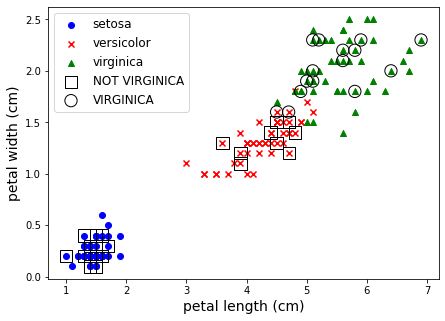

In [81]:
# 분류에서는 독립변수 -> 특성

plt.figure(figsize=(7,5))

c_set = ["blue", "red", "green"]
m_set = ["o", "x", "^"]
l_set = iris.target_names

for t in set(Y):
    X_pts = [X[i,2] for i in range(len(Y)) if Y[i] == t]
    Y_pts = [X[i,3] for i in range(len(Y)) if Y[i] == t]
    plt.scatter(X_pts, Y_pts, color = c_set[t], marker = m_set[t], label = l_set[t])

################################################
    
c_set = ["blue", "red"]
m_set = ["s", "o"]
l_set = ["NOT VIRGINICA","VIRGINICA"]

for t in set(y_pred):
    X_pts = [X_test[i,0] for i in range(len(X_test)) if y_pred[i] == t]
    Y_pts = [X_test[i,1] for i in range(len(X_test)) if y_pred[i] == t]
    plt.scatter(X_pts, Y_pts, s = 150, facecolors='none',  edgecolor = 'black', alpha=1, marker = m_set[t], label = l_set[t])

plt.xlabel(iris.feature_names[2], fontsize=14)
plt.ylabel(iris.feature_names[3], fontsize = 14)
plt.legend(loc = 'best', fontsize = 12)
plt.show()

# 4. 특징

- 분석 기법의 이름 자체에 <span class="mark">‘회귀’라는 단어가 들어가 있지만 다른 회귀 모형의 목적과 다르게 ‘분류’</span>를 수행한다.
- 즉, 로지스틱 회귀 모형은 **분류기(classifier)** 이다.

- 로지스틱 회귀의 기본 형태는 이진 분류이며, 예측 성능도 일반적으로 우수한 편이다.
- 실행 알고리즘을 다른 것으로 변경하여 다중 클래스들의 분류를 수행할 수 있다.

**다중 클래스 분류를 위한 로지스틱 회귀**
- 다중 클래스들에 대한 분류를 수행하는 회귀 모형을 **다항(multinomial) 로지스틱 회귀** 또는 **소프트맥스(softmax)회귀**라고 한다.
- 소프트맥스 회귀를 수행하려면 LogisticRegression의 매개변수 multi_class를 ‘multinomial’로, 매개변수 solver를‘lbfgs’로 지정해 준다.

```python
import sklearn.linear_model as lm

smr = lm.LogisticRegression(multi_class = "multinomial", solver = "lbfgs")

reg = smr.fit(X_train, y_train)
```

In [44]:
# 결과 해석 시, 1종 오류, 2종 오류, confusion Matrix
# classfication_report(예측, 결과)

# 의사결정 나무

# 5. 실습

In [82]:
import sklearn.datasets as d
import sklearn.preprocessing as pp
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as mt
import pandas as pd
import numpy as np

In [86]:
#dir(d)
cancer = d.load_breast_cancer()
#print(cancer.DESCR)
#cancer.feature_names
#cancer.target_names   # 종속변수
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [88]:
X = cancer.data
y = cancer.target

In [95]:
X_train, X_test, y_train, y_test = \
    ms.train_test_split(X, y, test_size = 0.3, random_state = 42)

# KFold 추가 가능

In [96]:
logr = lm.LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

In [97]:
y_pred = logr.predict(X_test)

In [98]:
# R2 필요없음 정확도 확인
acc = mt.accuracy_score(y_test, y_pred)
print('정확도 =',acc)

정확도 = 0.9649122807017544


In [100]:
# 정답 : y_test  - 171개(len(y_test))
y_test[100:111]
y_pred[100:111]
# 직접 샘플링해서 확인

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [102]:
# 높을수록 좋다
# f1-score 대표

# 분류 성능평가
rep = mt.classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [105]:
# 분류결과표
matrix = mt.confusion_matrix(y_test, y_pred)
print(matrix)

[[ 59   4]
 [  2 106]]


In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>